# Question 04

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path


In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  

import warnings
warnings.simplefilter("ignore")

crs = ccrs.PlateCarree() 

In [4]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")
ds

<xarray.Dataset>
Dimensions:           (time: 6443, lat: 251, lon: 234)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * time              (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-2...
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

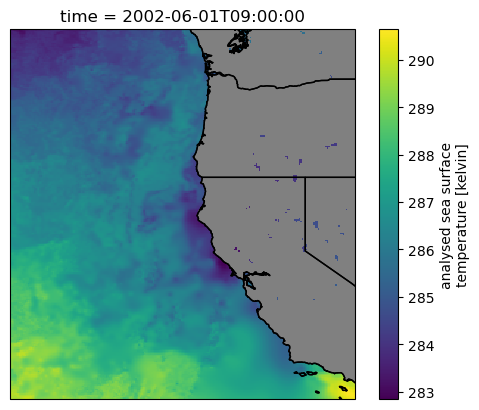

In [5]:
ds.analysed_sst[0, :, :].plot()

ax = plt.subplot(projection=crs)
ds.analysed_sst[0, :, :].plot(ax=ax, transform=crs)
ax.coastlines("10m", color="k")
ax.add_feature(cfeature.LAND, color="grey")
ax.add_feature(cfeature.STATES.with_scale("10m"))


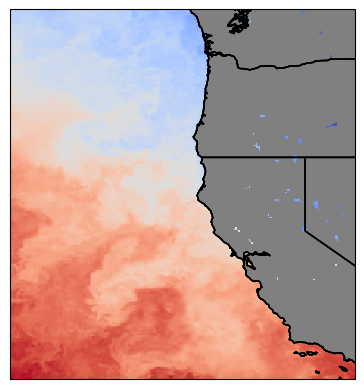

In [6]:
ax = plt.subplot(projection=crs)
ds.analysed_sst[0, :, :].plot(ax=ax, transform=crs)


ds_sel = ds.sel(time=slice('2014-01-01', '2014-01-31'))
lats = ds_sel.lat.values
lons = ds_sel.lon.values
lon_grid, lat_grid = np.meshgrid(lons, lats)
ax = plt.subplot(projection=crs)
im = ax.pcolormesh(lon_grid, lat_grid, 
                   ds_sel.analysed_sst[0], 
                   transform=ccrs.PlateCarree(), 
                   cmap='coolwarm')
ax.coastlines("10m", color="k")
ax.add_feature(cfeature.LAND, color="grey")
ax.add_feature(cfeature.STATES.with_scale("10m"))



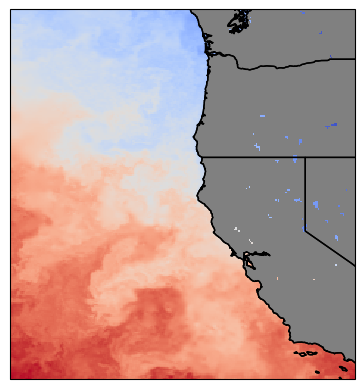

In [7]:
ds_sel = ds.sel(time=slice('2014-02-01', '2014-02-28'))
lats = ds_sel.lat.values
lons = ds_sel.lon.values
lon_grid, lat_grid = np.meshgrid(lons, lats)
ax = plt.subplot(projection=crs)
im = ax.pcolormesh(lon_grid, lat_grid, 
                   ds_sel.analysed_sst[0], 
                   transform=ccrs.PlateCarree(), 
                   cmap='coolwarm')
ax.coastlines("10m", color="k")
ax.add_feature(cfeature.LAND, color="grey")
ax.add_feature(cfeature.STATES.with_scale("10m"))